In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("../input/adult-census-income/adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


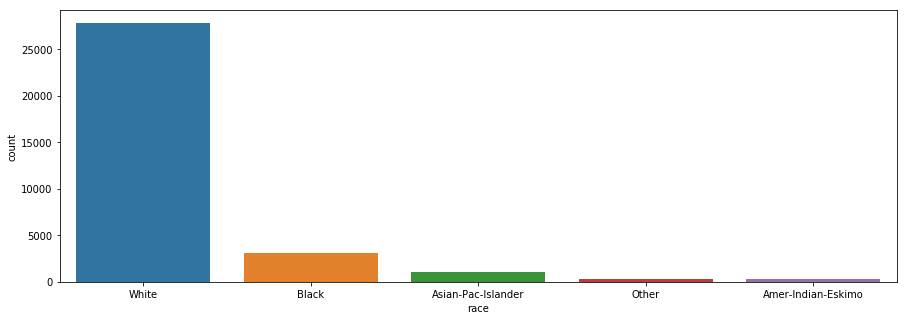

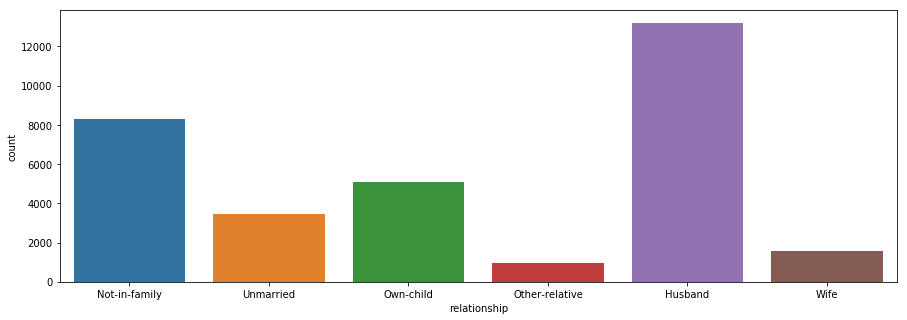

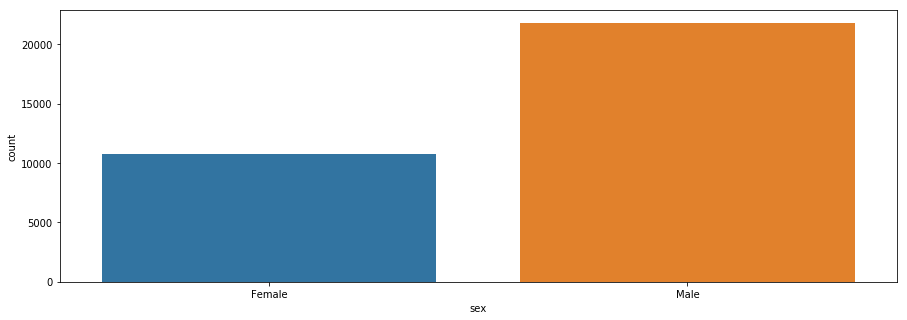

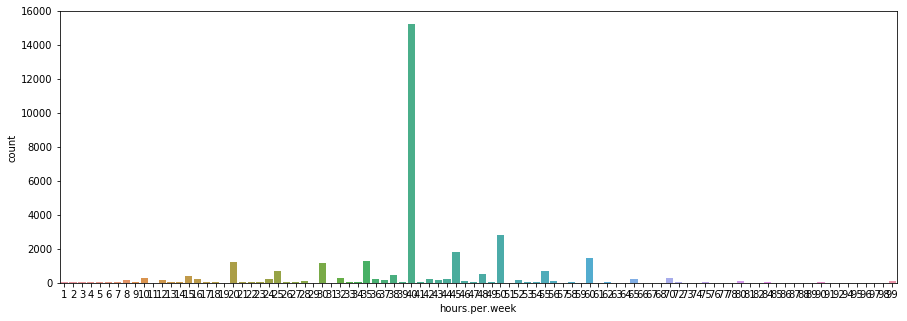

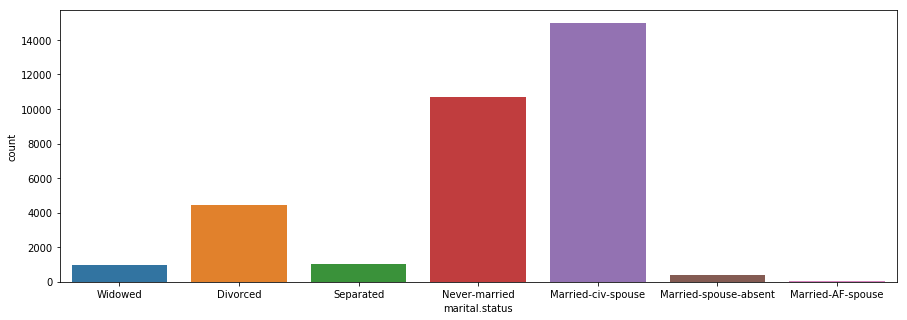

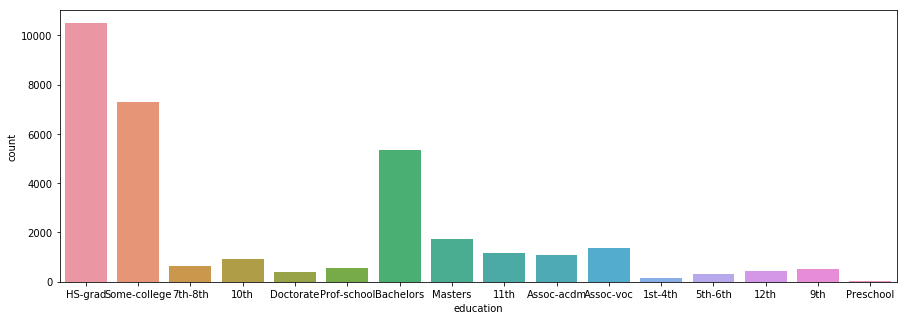

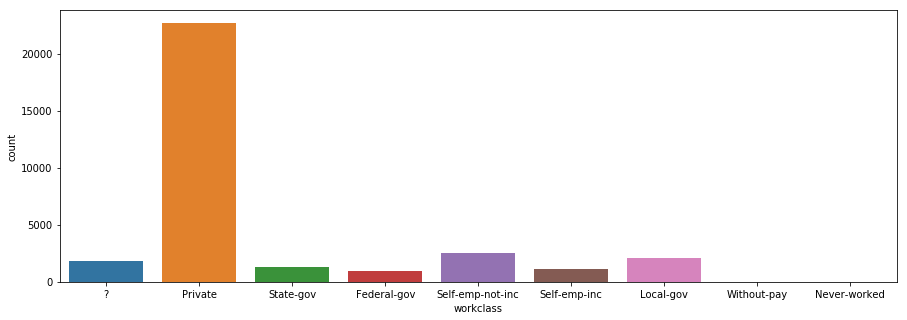

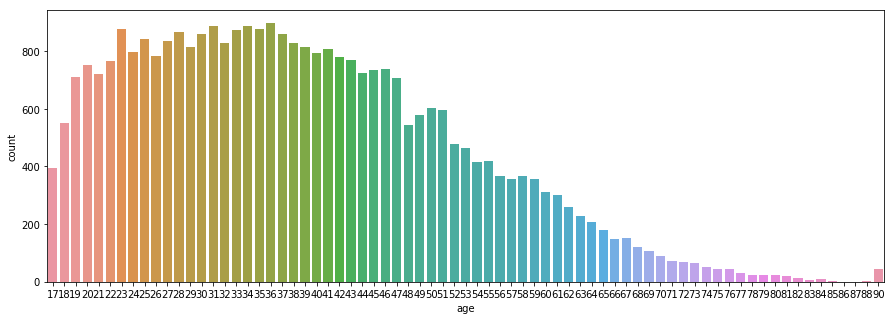

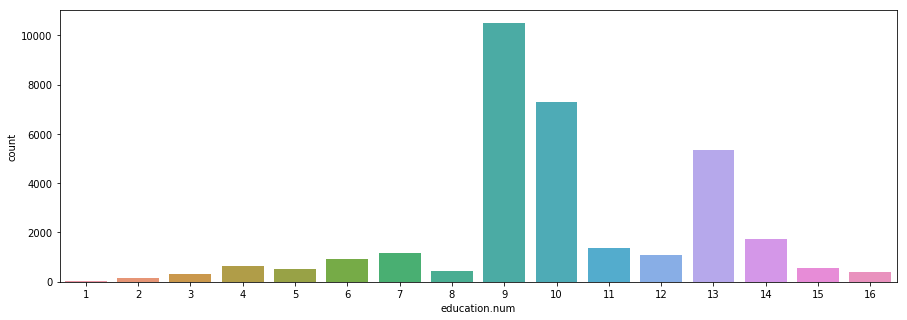

In [4]:
l = ['race','relationship','sex','hours.per.week','marital.status','education','workclass','age','education.num','relationship']
for i in l:
    plt.figure(i,figsize=(15,5))
    sns.countplot(df[i])

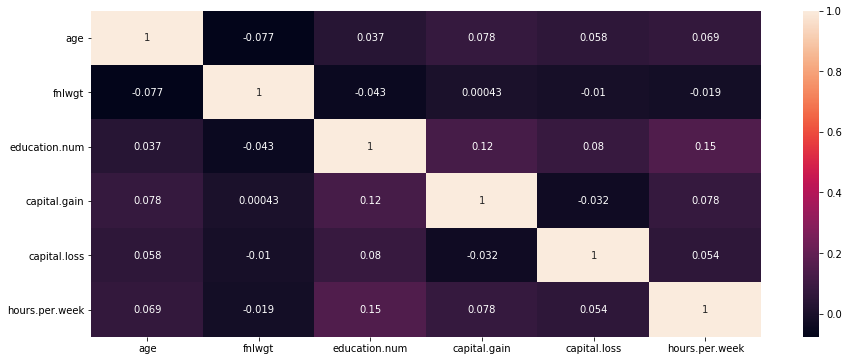

In [5]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [6]:
df[df=='?'] = np.nan

In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
for i in ['workclass','occupation','native.country']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [9]:
df.head()
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

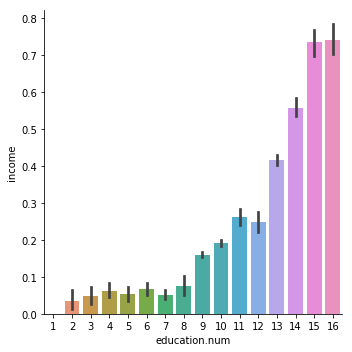

In [10]:
sns.catplot('education.num','income',data=df,kind='bar')

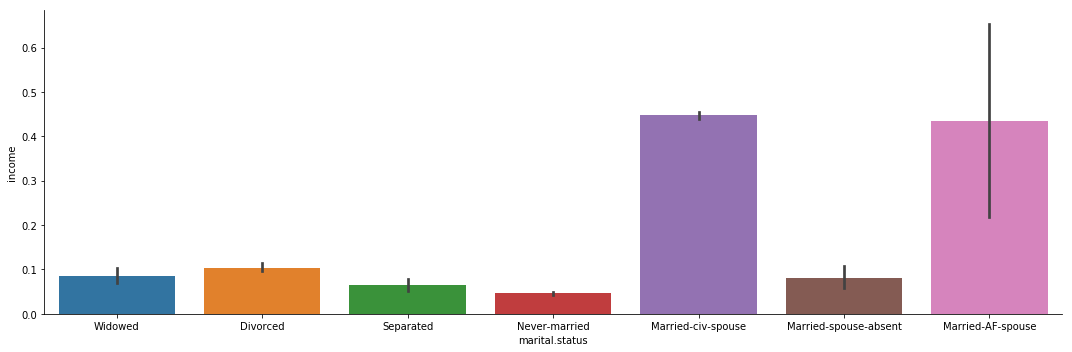

In [11]:
sns.catplot('marital.status','income',data=df,kind='bar',height=5,aspect=3)

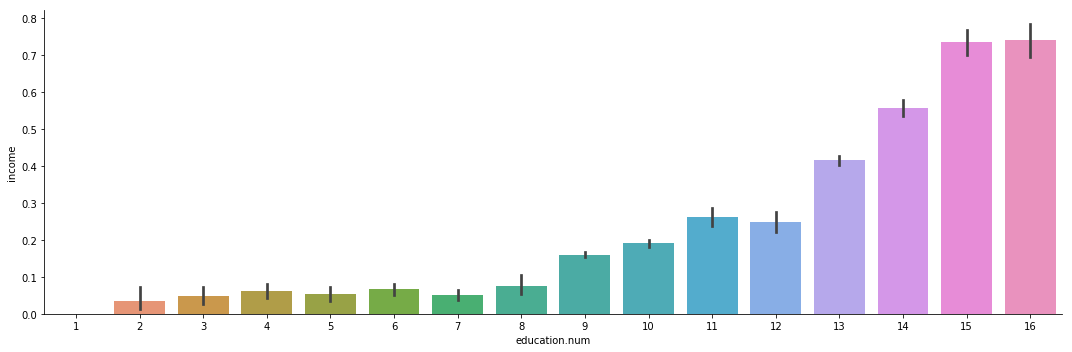

In [12]:
sns.catplot('education.num','income',data=df,kind='bar',height=5,aspect=3)

<Figure size 1080x360 with 0 Axes>

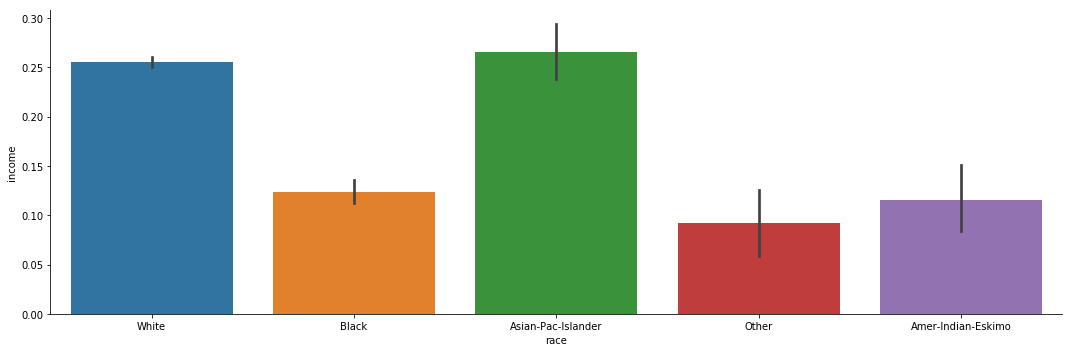

<Figure size 1080x360 with 0 Axes>

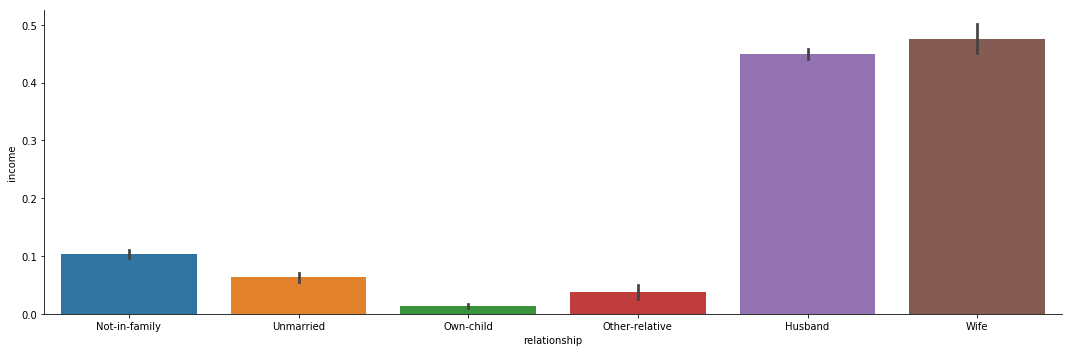

<Figure size 1080x360 with 0 Axes>

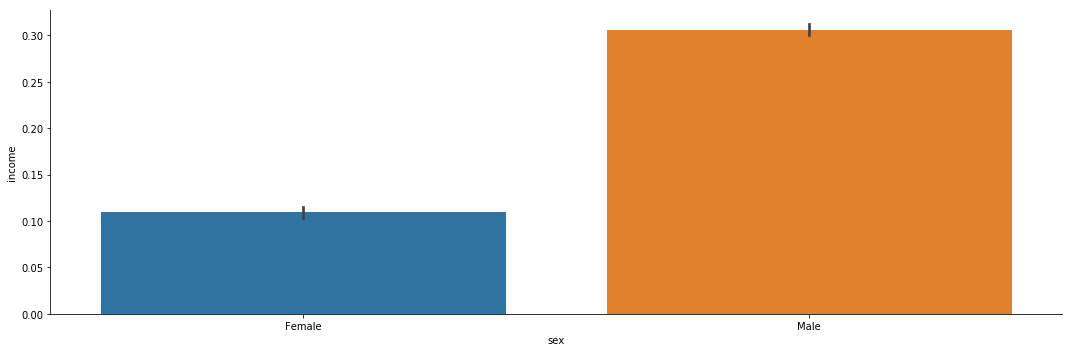

<Figure size 1080x360 with 0 Axes>

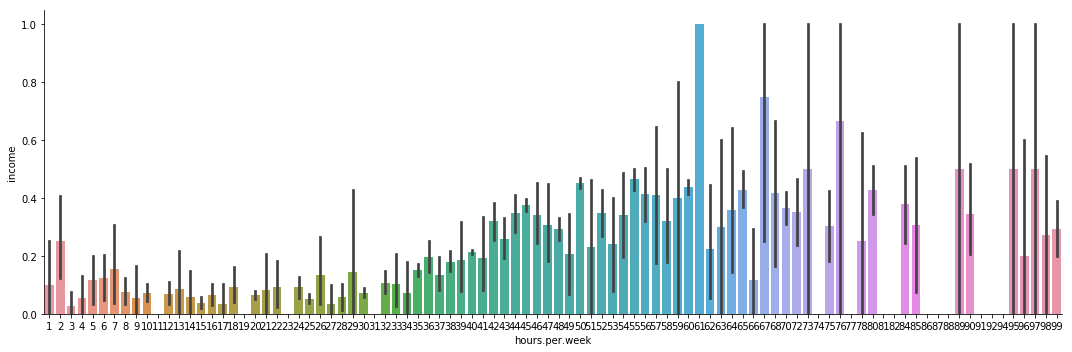

<Figure size 1080x360 with 0 Axes>

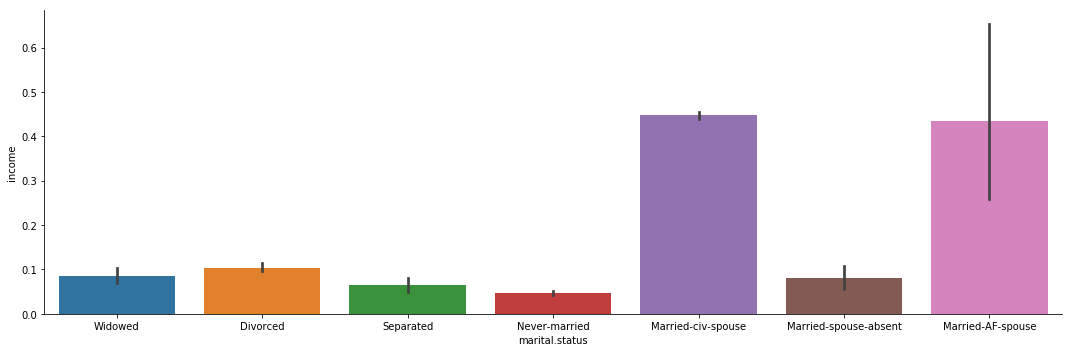

<Figure size 1080x360 with 0 Axes>

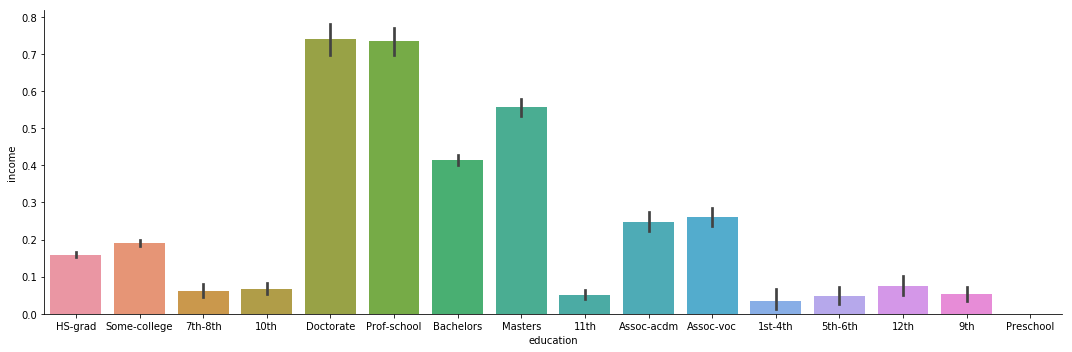

<Figure size 1080x360 with 0 Axes>

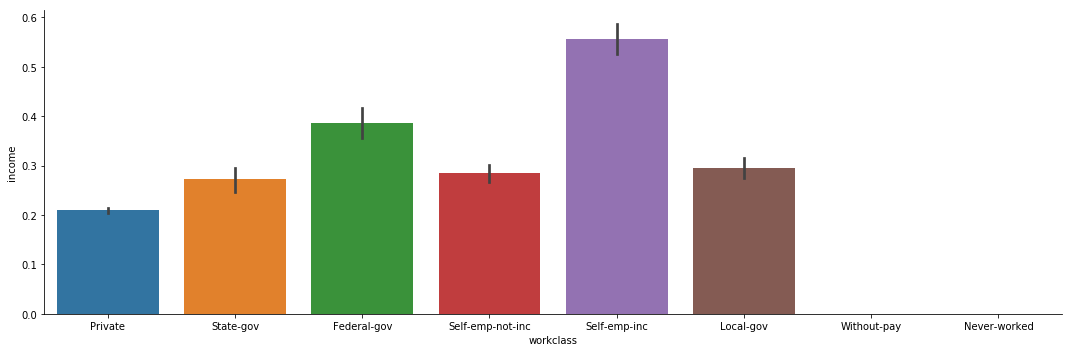

<Figure size 1080x360 with 0 Axes>

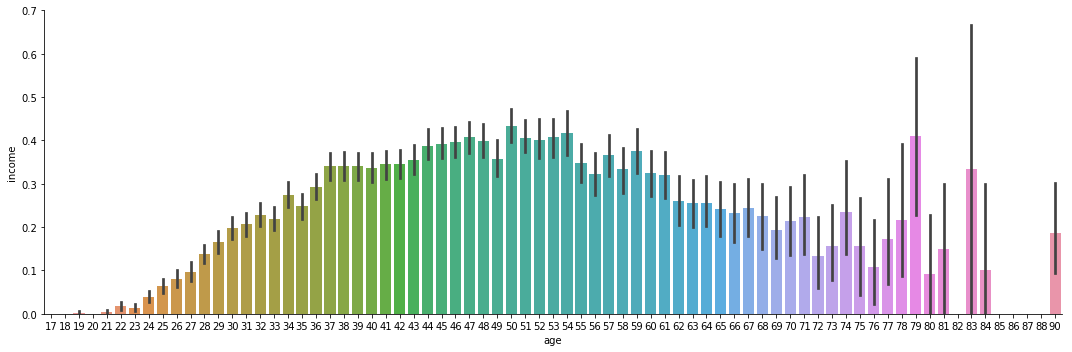

<Figure size 1080x360 with 0 Axes>

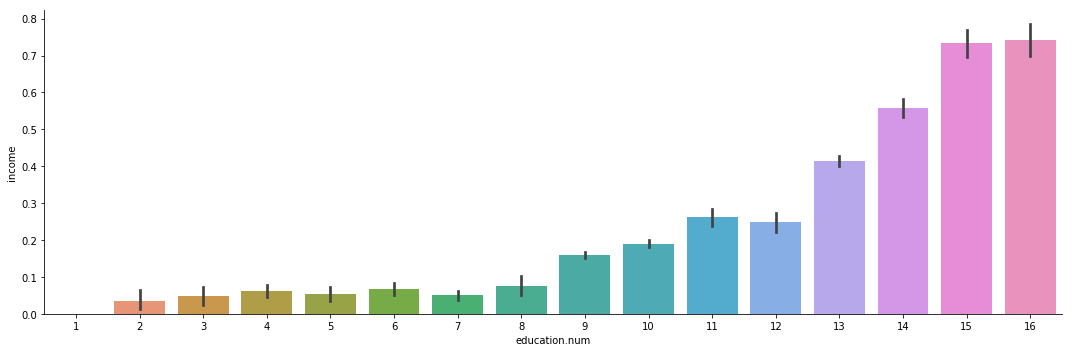

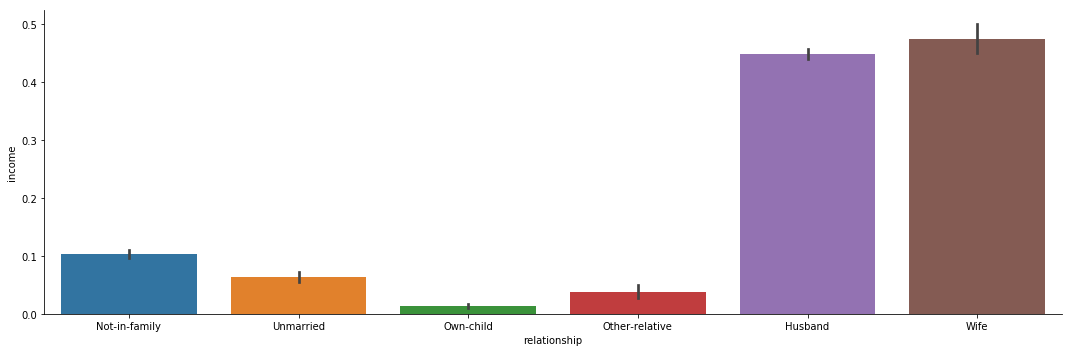

In [13]:
l = ['race','relationship','sex','hours.per.week','marital.status','education','workclass','age','education.num','relationship']
for i in l:
    plt.figure(i,figsize=(15,5))
    sns.catplot(i,'income',data=df,kind='bar',height=5,aspect=3)

In [14]:
df[(df['age']>=90) & (df['income']==1)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1739,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,1
1742,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,1
2296,90,Private,46786,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,9386,0,15,United-States,1
2299,90,Private,175491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,1
8914,90,Private,51744,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,1
18067,90,Private,88991,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,England,1
22166,90,Private,206667,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1
31799,90,Private,313986,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1


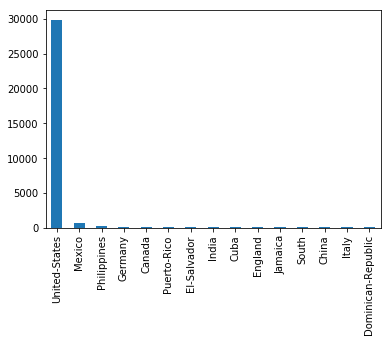

In [15]:
df['native.country'].value_counts()[:15].plot(kind='bar')

In [16]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [17]:
df_columns = df.select_dtypes('object').columns
lnc = LabelEncoder()
for i in df_columns:
    df[i] = lnc.fit_transform(df[i])

In [18]:
numerical_column_names = ['age','fnlwgt','education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
sc = StandardScaler()
df[numerical_column_names] = sc.fit_transform(df[numerical_column_names])

In [19]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,3,-1.067997,11,-0.420060,6,9,1,4,0,-0.14592,10.593507,-0.035429,38,0
1,3.183112,3,-0.539169,11,-0.420060,6,3,1,4,0,-0.14592,10.593507,-1.817204,38,0
2,2.010110,3,-0.035220,15,-0.031360,6,9,4,2,0,-0.14592,10.593507,-0.035429,38,0
3,1.130359,3,-0.468215,5,-2.363558,0,6,4,4,0,-0.14592,9.461864,-0.035429,38,0
4,0.177296,3,0.709482,15,-0.031360,5,9,3,4,0,-0.14592,9.461864,-0.035429,38,0


In [20]:
X = df.drop(['income'],axis=1)
y = df['income']

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split

In [22]:
cross_val_score(DecisionTreeClassifier(),X,y)

array([0.73483802, 0.71575553, 0.77702703, 0.78869779, 0.78055897])

In [23]:
cross_val_score(ExtraTreesClassifier(),X,y)

array([0.78028558, 0.77395577, 0.81511057, 0.82186732, 0.81541769])

In [24]:
cross_val_score(RandomForestClassifier(),X,y)

array([0.76969139, 0.76059582, 0.82002457, 0.82939189, 0.82585995])

In [25]:
cross_val_score(GaussianNB(),X,y)

array([0.72240135, 0.89450246, 0.77027027, 0.76781327, 0.76980958])

In [26]:
cross_val_score(LogisticRegression(),X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.79272225, 0.84106265, 0.78992629, 0.78839066, 0.79176904])

In [27]:
cross_val_score(KNeighborsClassifier(),X,y)

array([0.83141409, 0.80958231, 0.81342138, 0.81710688, 0.81388206])

In [28]:
cross_val_score(XGBClassifier(),X,y)

array([0.77875019, 0.77410934, 0.82048526, 0.82754914, 0.82186732])

In [29]:
cross_val_score(LGBMClassifier(),X,y)

array([0.770152  , 0.77257371, 0.83230958, 0.84106265, 0.83369165])

In [30]:
# Best Algorith:
#     LGBMClassifier,
#     XGBClassifier,
#     KNeighborsClassifier,
#     LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
# For Logisctic
params = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
grid_search = GridSearchCV(estimator=LogisticRegression(),param_grid=params,n_jobs=-1,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [32]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.03359818286283781, 'penalty': 'l1', 'solver': 'liblinear'}
0.8244325314324066


In [33]:
cross_val_score(LogisticRegression(**grid_search.best_params_,),X,y)
#not much effect

array([0.79318287, 0.84106265, 0.79100123, 0.78869779, 0.79023342])

In [34]:
# # RandomForest
# params = {
#     'n_estimators' : list(range(10,50,10)),
#     'max_features' : list(range(6,32,5))
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,n_jobs=-1)
# grid_search.fit(X_train,y_train)

In [35]:
params = {"learning_rate"    : [0.25, 0.30,0.35,0.40] ,
         "n_estimators":[100,200,300]}
grid_search = GridSearchCV(estimator=XGBClassifier(),param_grid=params,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.3, 0.35, 0.4],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, r

In [36]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8698601879440752
{'learning_rate': 0.3, 'n_estimators': 200}


In [37]:
params = [{'n_neighbors': list(range(1,20)),
'weights': ['distance'],
'algorithm': ['kd_tree']}]

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                          'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.831583772633509
{'algorithm': 'kd_tree', 'n_neighbors': 19, 'weights': 'distance'}


In [39]:
params = {
"criterion" : ['gini', 'entropy'],
"max_depth" : [4,6,8,12,13,15,17],
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [40]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8533119413247766
{'criterion': 'gini', 'max_depth': 6}
